In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import koreanize_matplotlib
import seaborn as sns 
from tensorflow.keras.layers import Dense,Flatten,Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer,text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from numpy import array

from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [2]:
data =pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/hotel_review_75000.csv",encoding="utf-8")

In [3]:
data["target"] = data["rating"].apply(lambda x: 1 if x >= 8 else 0)

In [20]:
docs = data["description"]

In [21]:
token = Tokenizer(lower=False)
token.fit_on_texts(docs)

In [22]:
 len(token.word_index) #전체 호텔 리뷰의 인덱스 개수 

261893

In [23]:
word_size = len(token.word_index)+1

In [24]:
X = token.texts_to_sequences(docs)

In [28]:
classes = data["target"]

In [27]:
max_length = max(len(i)for i in X)

In [ ]:
X2 = pd.Series(X)
X2 

In [ ]:
X2_len =X2.apply(len)
X2_len.max()

In [29]:
padded_x = pad_sequences(X,max_length)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(padded_x, classes, test_size=0.4, random_state=7)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=7)

In [34]:
# 단어 임베딩을 포함해서 딥러닝 모델 생성
model = Sequential()
model.add(Embedding(word_size, 32, input_length=377)) 
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 377, 32)           8380608   
                                                                 
 flatten_1 (Flatten)         (None, 12064)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 12065     
                                                                 
Total params: 8,392,673
Trainable params: 8,392,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelpath = "./deep_model/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=2)

model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
print('Accuracy: ', model.evaluate(X_test, y_test)[1])

In [38]:
def plt_show(x):
    y_val_loss = history.history['val_loss']
    y_loss = history.history['loss']
    x_len = np.arange(len(y_loss))
    plt.plot(x_len, y_val_loss, marker='.', c="red", label='Testset_loss')
    plt.plot(x_len, y_loss, marker='.', c="blue", label='trainset_loss')
    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

## RNN,LSTM 텍스트 분석 
* RNN(Recurrent Neural Network) : 시간적으로 연속성이 있는 데이터를 처리하려고 만든 인공 신경망 
    * 이전 은닉층이 현재 은닉층의 입력이 되면서, 반복되는 순환 구조를 가진다. 
* RNN의 가장 큰 차이점은 기억을 갖는(memory) 신경망 
* 텍스트 분석 , 시계열 데이터 분석에 활용 

## LSTM
* RNN은 입력이 길어지면 가장 먼저 입력된 정보를 잊어버림 (기울기 소실 문제) 
* 기울기 소멸 문제를 해결하기 위해 망각 게이트, 입력 게이트 , 출력 게이트 추가
* 정보가 소실되지 않고 기억되도록 함 

In [35]:
from tensorflow.keras.layers import LSTM

In [36]:
model = Sequential()
model.add(Embedding(word_size, 32, input_length=max_length))
model.add(LSTM(max_length,activation="tanh")) # LSTM은 하이퍼볼릭 탄젠트를 사용한다 
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 377, 32)           8380608   
                                                                 
 lstm (LSTM)                 (None, 377)               618280    
                                                                 
 dense_2 (Dense)             (None, 1)                 378       
                                                                 
Total params: 8,999,266
Trainable params: 8,999,266
Non-trainable params: 0
_________________________________________________________________


In [37]:
modelpath = "./deep_model/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=2)
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
print('Accuracy: ', model.evaluate(X_test, y_test)[1])


Epoch 1/5
1407/1407 [==============================] - 123s 85ms/step - loss: 0.3944 - accuracy: 0.8253 - val_loss: 0.3679 - val_accuracy: 0.8375
Epoch 2/5
1407/1407 [==============================] - 120s 85ms/step - loss: 0.1816 - accuracy: 0.9322 - val_loss: 0.4038 - val_accuracy: 0.8564
Epoch 3/5
1407/1407 [==============================] - 121s 86ms/step - loss: 0.0734 - accuracy: 0.9767 - val_loss: 0.4779 - val_accuracy: 0.8385
Epoch 4/5
1407/1407 [==============================] - 121s 86ms/step - loss: 0.0456 - accuracy: 0.9856 - val_loss: 0.6158 - val_accuracy: 0.8355
Epoch 5/5
469/469 [==============================] - 13s 28ms/step - loss: 0.6523 - accuracy: 0.8288
Accuracy:  0.8288000226020813


NameError: name 'plt_show' is not defined

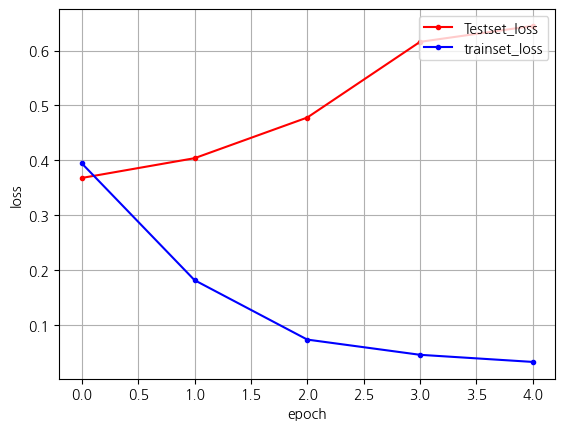

In [39]:
plt_show(history)

## LSTM과 CNN 조합 모델로 분석

In [40]:
from tensorflow.keras.layers import Dropout,Activation,Conv1D,MaxPooling1D

In [42]:
model = Sequential()
model.add(Embedding(word_size,32,input_length=max_length))
model.add(Dropout(0.5))
model.add(Conv1D(64,5,padding="valid",activation="relu",strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(max_length))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 377, 32)           8380608   
                                                                 
 dropout (Dropout)           (None, 377, 32)           0         
                                                                 
 conv1d (Conv1D)             (None, 373, 64)           10304     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 93, 64)           0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 377)               666536    
                                                                 
 dense_3 (Dense)             (None, 1)                 378       
                                                      

Epoch 1/5
1407/1407 [==============================] - 63s 41ms/step - loss: 0.3857 - accuracy: 0.8317 - val_loss: 0.3222 - val_accuracy: 0.8636
Epoch 2/5
1407/1407 [==============================] - 58s 41ms/step - loss: 0.2243 - accuracy: 0.9119 - val_loss: 0.3443 - val_accuracy: 0.8558
Epoch 3/5
1407/1407 [==============================] - 59s 42ms/step - loss: 0.1241 - accuracy: 0.9556 - val_loss: 0.4550 - val_accuracy: 0.8465
Epoch 4/5
1407/1407 [==============================] - 61s 43ms/step - loss: 0.0836 - accuracy: 0.9710 - val_loss: 0.5014 - val_accuracy: 0.8406
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.5972 - accuracy: 0.8345
Accuracy:  0.8344666957855225


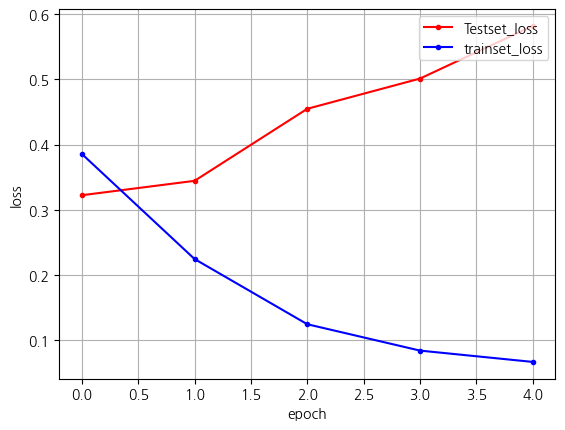

In [43]:
modelpath = "./deep_model/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=2)
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
print('Accuracy: ', model.evaluate(X_test, y_test)[1])

plt_show(history)

## Attention을 이용한 분석 

In [44]:
from attention import Attention

In [48]:
model = Sequential()

model.add(Embedding(word_size,32,input_length=max_length))
model.add(Dropout(0.5))
model.add(LSTM(64,return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 377, 32)           8380608   
                                                                 
 dropout_7 (Dropout)         (None, 377, 32)           0         
                                                                 
 lstm_5 (LSTM)               (None, 377, 64)           24832     
                                                                 
 attention_3 (Attention)     (None, 128)               20480     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 256)               33024     
                                                                 
 dense_20 (Dense)            (None, 128)              

Epoch 1/5
1407/1407 [==============================] - 55s 37ms/step - loss: 0.3666 - accuracy: 0.8401 - val_loss: 0.3069 - val_accuracy: 0.8724
Epoch 2/5
1407/1407 [==============================] - 52s 37ms/step - loss: 0.2003 - accuracy: 0.9264 - val_loss: 0.3472 - val_accuracy: 0.8623
Epoch 3/5
1407/1407 [==============================] - 52s 37ms/step - loss: 0.1016 - accuracy: 0.9656 - val_loss: 0.4470 - val_accuracy: 0.8544
Epoch 4/5
1407/1407 [==============================] - 52s 37ms/step - loss: 0.0634 - accuracy: 0.9794 - val_loss: 0.4890 - val_accuracy: 0.8429
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.5699 - accuracy: 0.8410
Accuracy:  0.8410000205039978


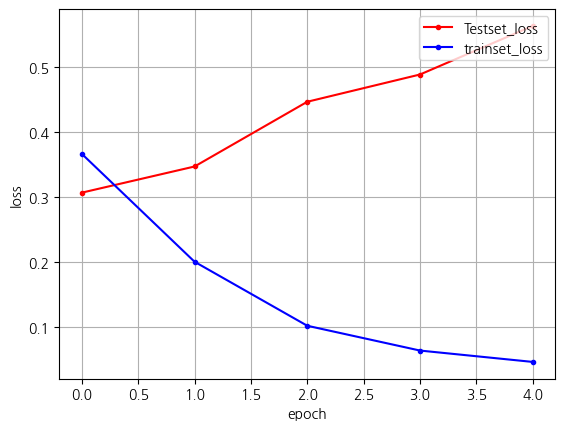

In [49]:
modelpath = "./deep_model/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=2)
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
print('Accuracy: ', model.evaluate(X_test, y_test)[1])

plt_show(history)

# 이전 내용

In [11]:
text = '해보지 않으면 해낼 수 없다'

In [14]:
result = text_to_word_sequence(text)

In [15]:
print(f"원본 : {text}")
print(f"토큰화 : {result}") # 토큰, 코퍼스(corpus) : 자연 언어 연구를 위해 

원본 : 해보지 않으면 해낼 수 없다
토큰화 : ['해보지', '않으면', '해낼', '수', '없다']


In [16]:
# 단어 빈도수 세기 
docs = ["먼저 텍스트의 각 단어를 나누어 토큰화 합니다.",
       "텍스트의 단어로 토큰화 해야 딥러닝에서 인식",
       "토큰화한 결과는 딥러닝에서 사용할 수 있습니다"]

In [17]:
token = Tokenizer(lower=False)
token.fit_on_texts(docs)

In [18]:
print(f"단어 갯수 : {token.word_counts}")

단어 갯수 : OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화', 2), ('합니다', 1), ('단어로', 1), ('해야', 1), ('딥러닝에서', 2), ('인식', 1), ('토큰화한', 1), ('결과는', 1), ('사용할', 1), ('수', 1), ('있습니다', 1)])


In [19]:
print(f"문장 카운트 {token.document_count}")

문장 카운트 3


In [20]:
print(f"각 단어가 몇 개의 문장에 포함 되어 있는가?{token.word_docs}")

각 단어가 몇 개의 문장에 포함 되어 있는가?defaultdict(<class 'int'>, {'각': 1, '토큰화': 2, '텍스트의': 2, '나누어': 1, '합니다': 1, '단어를': 1, '먼저': 1, '딥러닝에서': 2, '해야': 1, '단어로': 1, '인식': 1, '토큰화한': 1, '있습니다': 1, '수': 1, '결과는': 1, '사용할': 1})


In [21]:
print(f"각 단어에 매겨진 인덱스 :{token.word_index}")

각 단어에 매겨진 인덱스 :{'텍스트의': 1, '토큰화': 2, '딥러닝에서': 3, '먼저': 4, '각': 5, '단어를': 6, '나누어': 7, '합니다': 8, '단어로': 9, '해야': 10, '인식': 11, '토큰화한': 12, '결과는': 13, '사용할': 14, '수': 15, '있습니다': 16}


## 단어의 원 핫 인코딩

In [22]:
text = "오랫동안 꿈꾸는 이는 그 꿈을 닮아간다"
token = Tokenizer(lower=False)
token.fit_on_texts([text])

print(token.word_index)

{'오랫동안': 1, '꿈꾸는': 2, '이는': 3, '그': 4, '꿈을': 5, '닮아간다': 6}


In [25]:
# 단어를 벡터로 변환 

x = token.texts_to_sequences([text])

In [26]:
# 인덱스에 1을 추가해서 원 - 핫 인코딩 배열을 만들기

word_size = len(token.word_index) +1 
# 

In [27]:
x = to_categorical(x,num_classes=word_size)
print(x)

# 원 핫 인코딩 행렬

[[[0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]


## 텍스트를 읽고 긍정, 부정 예측하기 

In [56]:
docs = ["너무 재미있네요","최고에요","참 잘 만든 영화예요","추천하고 싶은 영화 입니다.",
       "한번 더 보고싶네요","글쎄요","별로에요","생각보다 지루하네요","연기가 어색해요","재미없어요",
       ]

# 긍정 리뷰 1 , 부정 리뷰 0으로 클래스 지정 
classes = array([1,1,1,1,1,0,0,0,0,0])


In [34]:
# 토큰화 

token = Tokenizer(lower=False)
token.fit_on_texts(docs)
print(token.word_index)

{'너무': 1, '재미있네요': 2, '최고에요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화': 10, '입니다': 11, '한번': 12, '더': 13, '보고싶네요': 14, '글쎄요': 15, '별로에요': 16, '생각보다': 17, '지루하네요': 18, '연기가': 19, '어색해요': 20, '재미없어요': 21}


In [36]:
# 원 핫 인코딩 

y = token.texts_to_sequences(docs)

In [46]:
# 패딩 추가 
max_length = max(len(item) for item in y)

In [47]:
padded_x = pad_sequences(y,max_length)

In [55]:
padded_x[1]

array([0, 0, 0, 3])

In [59]:
classes[1]

1

In [49]:
# 임베딩에 입력된 단어의 수를 지정 
word_size = len(token.word_index)+ 1 

In [50]:
# 단어 임베딩을 포함해서 딥러닝 모델 생성 
model = Sequential()
model.add(Embedding(word_size,8,input_length=max_length))
model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 8)              176       
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
history = model.fit(padded_x,classes,epochs=20)
print(f"Accuracy: {model.evaluate(padded_x,classes)[1]}")

Epoch 1/20
1/1 [==============================] - 0s 411ms/step - loss: 0.5956 - accuracy: 0.9000
Epoch 2/20
1/1 [==============================] - 0s 20ms/step - loss: 0.5931 - accuracy: 0.9000
Epoch 3/20
1/1 [==============================] - 0s 17ms/step - loss: 0.5906 - accuracy: 0.9000
Epoch 4/20
1/1 [==============================] - 0s 1ms/step - loss: 0.5881 - accuracy: 0.9000
Epoch 5/20
1/1 [==============================] - 0s 0s/step - loss: 0.5856 - accuracy: 0.9000
Epoch 6/20
1/1 [==============================] - 0s 0s/step - loss: 0.5831 - accuracy: 0.9000
Epoch 7/20
1/1 [==============================] - 0s 0s/step - loss: 0.5805 - accuracy: 0.9000
Epoch 8/20
1/1 [==============================] - 0s 13ms/step - loss: 0.5780 - accuracy: 0.9000
Epoch 9/20
1/1 [==============================] - 0s 0s/step - loss: 0.5755 - accuracy: 0.9000
Epoch 10/20
1/1 [==============================] - 0s 0s/step - loss: 0.5729 - accuracy: 0.9000
Epoch 11/20
1/1 [======================

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, <class 'numpy.int32'>